In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
#reading files
train=pd.read_csv("/content/train_tweet.csv")
test=pd.read_csv("/content/test_tweets.csv")
print(train.shape)
print(test.shape)

(31962, 3)
(17197, 2)


In [ ]:
train.head(2)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...


In [ ]:
test.head(2)

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...


In [ ]:
train.isnull().sum()
test.isnull().sum()

id       0
tweet    0
dtype: int64

In [ ]:
train[train['label']==0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [ ]:
train[train['label']==1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


<Axes: >

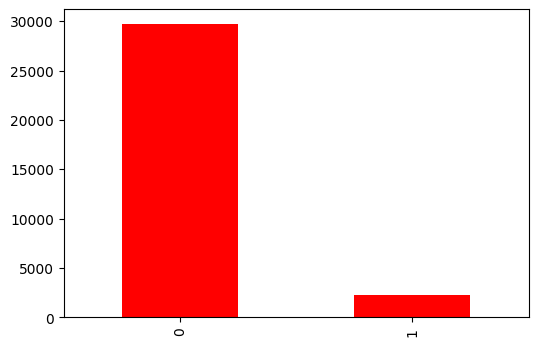

In [ ]:
#plotting normal and negative tools
train['label'].value_counts().plot.bar(color='red',figsize=(6,4))

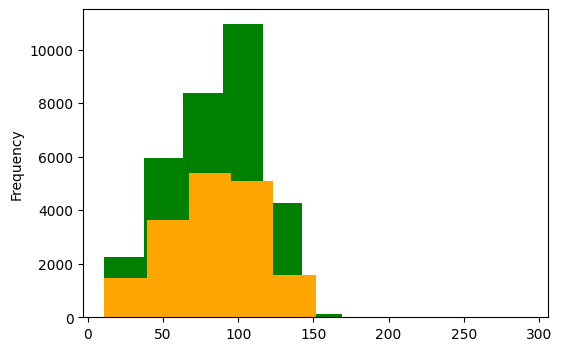

In [ ]:
#histogram for tweets length in train and test sets
length_train=train['tweet'].str.len().plot.hist(color='green',figsize=(6,4))
length_test=test['tweet'].str.len().plot.hist(color='orange',figsize=(6,4))

In [ ]:
train['len']=train['tweet'].str.len()
test['len']=test['tweet'].str.len()
train.head()

,id,label,tweet,len
0,1,0,@user when a father is dysfunctional and is s...,102
1,2,0,@user @user thanks for #lyft credit i can't us...,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in ...,86
4,5,0,factsguide: society now #motivation,39


In [ ]:
train.groupby('label').describe()

id                                                               \
         count          mean          std   min      25%      50%       75%   
label                                                                         
0      29720.0  15974.454441  9223.783469   1.0  7981.75  15971.5  23965.25   
1       2242.0  16074.896075  9267.955758  14.0  8075.25  16095.0  24022.00   

                    len                                                        
           max    count       mean        std   min   25%   50%    75%    max  
label                                                                          
0      31962.0  29720.0  84.328634  29.566484  11.0  62.0  88.0  107.0  274.0  
1      31961.0   2242.0  90.187779  27.375502  12.0  69.0  96.0  111.0  152.0

<ipython-input-27-4a0eb099d63e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train.groupby('len').mean()['label'].plot.hist(color='black',figsize=(6,4),)


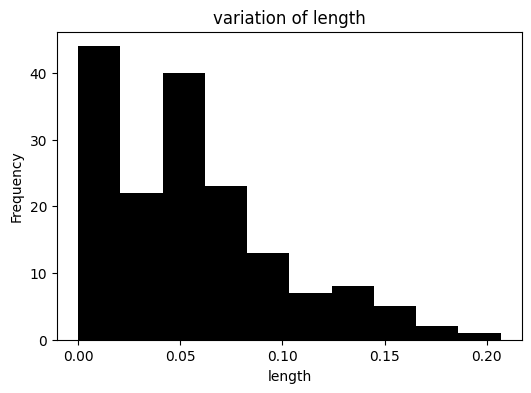

In [ ]:
#plotting variation in length
train.groupby('len').mean()['label'].plot.hist(color='black',figsize=(6,4),)
plt.title('variation of length')
plt.xlabel('length')
plt.show()

Text(0.5, 1.0, 'Most frqently occuring words-Top 30')

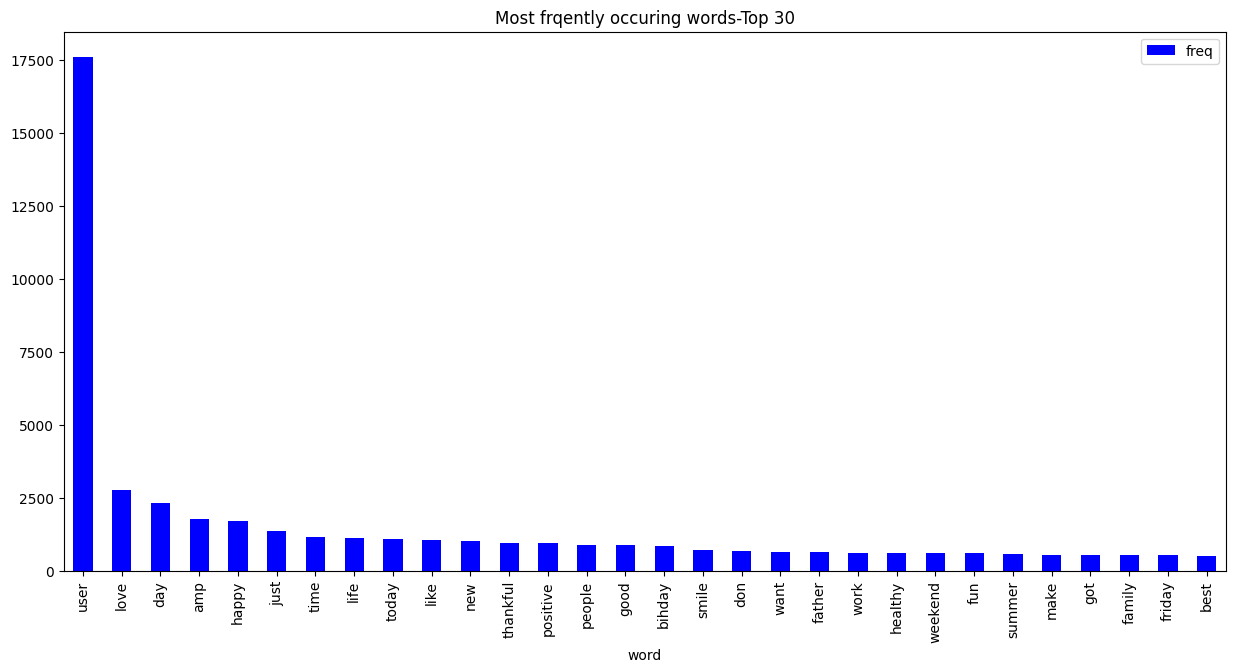

In [ ]:
#top 30 words and its count
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(stop_words='english')
words=cv.fit_transform(train.tweet)
sum_words=words.sum(axis=0)
words_freq=[(word,sum_words[0,i])for word,i in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x:x[1],reverse=True)
frequency=pd.DataFrame(words_freq,columns=['word','freq'])
frequency.head(30).plot(x='word',y='freq',kind='bar',figsize=(15,7),color='blue')
plt.title("Most frqently occuring words-Top 30")

(-0.5, 999.5, 999.5, -0.5)

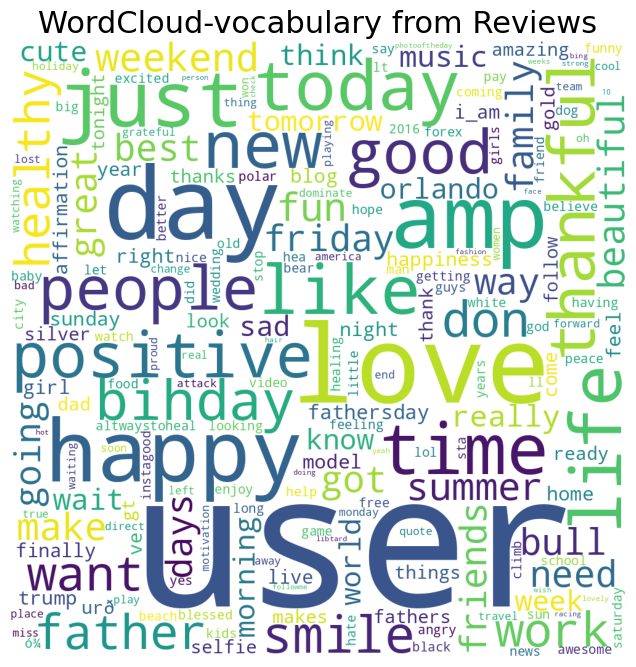

In [ ]:
#most usage words in tweets
from wordcloud import WordCloud
wordcloud=WordCloud(background_color='white',width=1000,height=1000).generate_from_frequencies(dict(words_freq))
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud-vocabulary from Reviews",fontsize=22)
plt.axis('off')

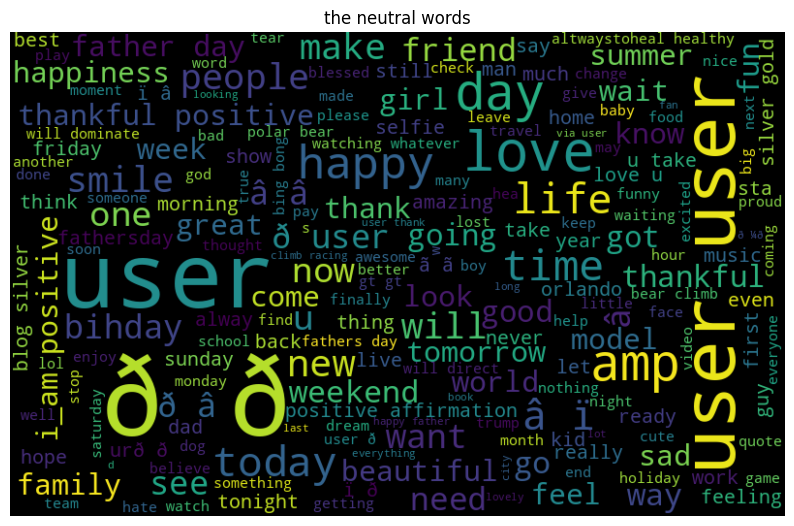

In [ ]:
#most usage words in normal tweets
normal_words=''.join([text for text in train['tweet'][train['label']==0]])
wordcloud=WordCloud(width=800,height=500,random_state=0,max_font_size=110).generate(normal_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('the neutral words')
plt.show()

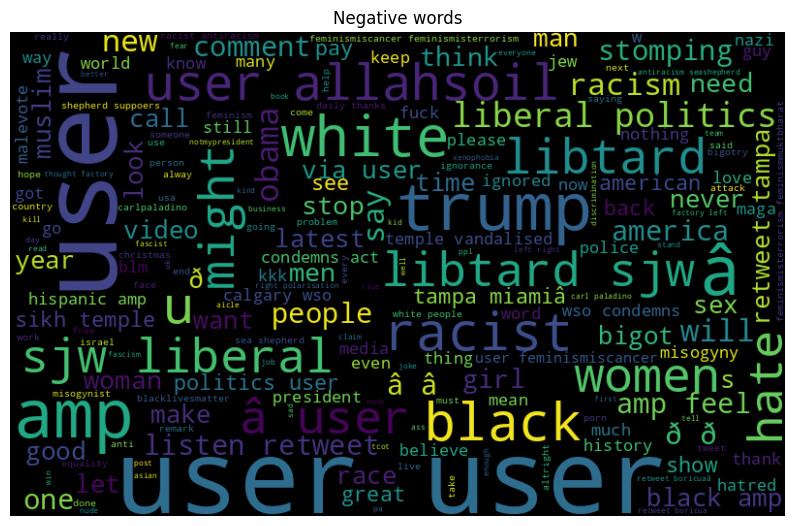

In [ ]:
#most usage words in negative tweets
negative_words="".join([text for text in train['tweet'][train['label']==1]])
wordcloud=WordCloud(width=800,height=500,max_font_size=110).generate(negative_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title("Negative words")
plt.show()


In [ ]:

import re
def hashtag_extract(x):
  hashtags=[]
  for i in x:
    ht=re.findall(r"#(\w+)",i)
    hashtags.append(ht)
  return hashtags

In [ ]:
hash_regular=hashtag_extract(train['tweet'][train['label']==0])
hash_negative=hashtag_extract(train['tweet'][train['label']==1])
hash_regular=sum(hash_regular,[])
hash_negative=sum(hash_negative,[])


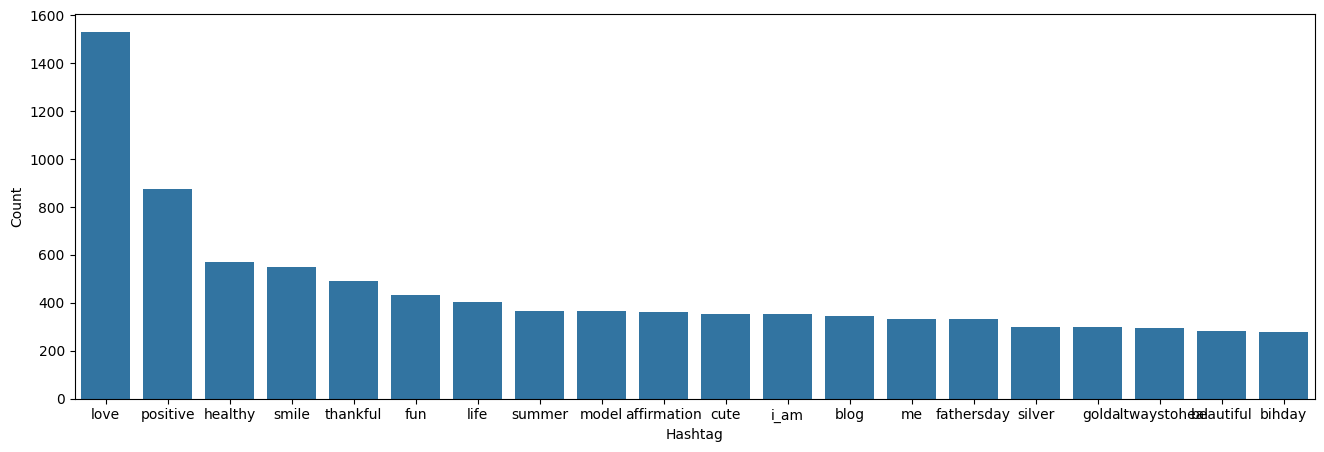

In [ ]:
# bar plot
import nltk
a=nltk.FreqDist(hash_regular)
d=pd.DataFrame({'Hashtag':list(a.keys()),'count':list(a.values())})
d=d.nlargest(columns='count',n=20)
plt.figure(figsize=(16,5))
ax=sns.barplot(data=d,x='Hashtag',y="count")
ax.set(ylabel='Count')
plt.show()


In [ ]:
!pip install genism

ERROR: Could not find a version that satisfies the requirement genism (from versions: none)
ERROR: No matching distribution found for genism


In [ ]:
# tokenizing the words present in the training set
tokenized_tweet = train['tweet'].apply(lambda x: x.split())

# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            # desired no. of features/independent variables
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(train['tweet']), epochs=20)

(6109683, 8411580)

In [ ]:
model_w2v.wv.most_similar(positive = "dinner")

[('spaghetti', 0.6686270236968994),
 ('dialogue', 0.6169848442077637),
 ('#pamper', 0.6134044528007507),
 ('#prosecco', 0.612072229385376),
 ('coaching', 0.6111235022544861),
 ('bay.', 0.6097784042358398),
 ('7!', 0.6061972379684448),
 ('weekend...', 0.6056687831878662),
 ('#travelling', 0.6029502153396606),
 ('#boardgames', 0.5980024337768555)]

In [ ]:
!pip install tqdm
!pip install gensim


In [ ]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import TaggedDocument

In [ ]:
def add_label(twt):
  output=[]
  for i,s in zip(twt.index,twt):
    output.append(TaggedDocument(s,['tweet_'+str(i)]))
  return output
labeled_tweets=add_label(tokenized_tweet)
labeled_tweets[:6]

[TaggedDocument(words=['@user', 'when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is', 'so', 'selfish', 'he', 'drags', 'his', 'kids', 'into', 'his', 'dysfunction.', '#run'], tags=['tweet_0']),
 TaggedDocument(words=['@user', '@user', 'thanks', 'for', '#lyft', 'credit', 'i', "can't", 'use', 'cause', 'they', "don't", 'offer', 'wheelchair', 'vans', 'in', 'pdx.', '#disapointed', '#getthanked'], tags=['tweet_1']),
 TaggedDocument(words=['bihday', 'your', 'majesty'], tags=['tweet_2']),
 TaggedDocument(words=['#model', 'i', 'love', 'u', 'take', 'with', 'u', 'all', 'the', 'time', 'in', 'urð\x9f\x93±!!!', 'ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91', 'ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦'], tags=['tweet_3']),
 TaggedDocument(words=['factsguide:', 'society', 'now', '#motivation'], tags=['tweet_4']),
 TaggedDocument(words=['[2/2]', 'huge', 'fan', 'fare', 'and', 'big', 'talking', 'before', 'they', 'leave.', 'chaos', 'and', 'pay', 'disputes', 'when', 'they', 'get', 'there.', '#allshowandnogo'],

In [ ]:
# removing unwanted patterns from the data

import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
train_corpus = []

for i in range(0, 31962):
  review = re.sub('[^a-zA-Z]', ' ', train['tweet'][i])
  review = review.lower()
  review = review.split()

  ps = PorterStemmer()

  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]

  # joining them back with space
  review = ' '.join(review)
  train_corpus.append(review)

In [ ]:
test_corpus = []

for i in range(0, 17197):
  review = re.sub('[^a-zA-Z]', ' ', test['tweet'][i])
  review = review.lower()
  review = review.split()

  ps = PorterStemmer()

  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]

  # joining them back with space
  review = ' '.join(review)
  test_corpus.append(review)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=2500)
x=cv.fit_transform(train_corpus).toarray()
y=train.iloc[:,1]
print(x.shape)
print(y.shape)

(31962, 2500)
(31962,)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=2500)
x_test=cv.fit_transform(test_corpus).toarray()
print(x_test.shape)

(17197, 2500)


In [ ]:
# splitting the training data into train and valid sets

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.25, random_state = 42)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(23971, 2500)
(7991, 2500)
(23971,)
(7991,)


In [ ]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)



Training Accuracy : 0.9991656585040257
Validation Accuracy : 0.9523213615317232
F1 score : 0.615539858728557
[[7305  127]
 [ 254  305]]


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy : 0.9851487213716574
Validation Accuracy : 0.9416843949443123
f1 score : 0.5933682373472949
[[7185  247]
 [ 219  340]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)


Training Accuracy : 0.9991656585040257
Validation Accuracy : 0.9327993993242397
f1 score : 0.5421994884910485
[[7136  296]
 [ 241  318]]
